In [22]:
import os 
import shutil
import json

parent_folder_new_dataset = "/tudelft/abharadwaj1/staff-umbrella/ajlab/AB/parking_for_files/fromDB/large_scale_feature_enhance/"
feature_enhance_completed = lambda x : os.path.exists(os.path.join(parent_folder_new_dataset, x, "hallucinations_probabilities_map.mrc"))
observed_probabilities_file = lambda x : os.path.join(parent_folder_new_dataset, x, f"{x}_feature_enhance_locscale_processing_2_2", "observed_probabilities.json")
read_json_file = lambda x : json.load(open(x, "r"))

probabilities = {
    "70" : [],
    "80" : [],
    "90" : [],
    "95" : [],
    "99" : [],
}
failed_for_70 = []
failed_for_80 = []
failed_for_90 = []
failed_for_95 = []
failed_for_99 = []

for folder in os.listdir(parent_folder_new_dataset):
    if feature_enhance_completed(folder):
        probabilities_file = read_json_file(observed_probabilities_file(folder)) 
        
        if probabilities_file["70"] < threshold_for_70:
            failed_for_70.append(folder)
        
        if probabilities_file["80"] < threshold_for_80:
            failed_for_80.append(folder)
        
        if probabilities_file["90"] < threshold_for_90:
            failed_for_90.append(folder)
        
        if probabilities_file["95"] < threshold_for_95:
            failed_for_95.append(folder)
        
        if probabilities_file["99"] < threshold_for_99:
            failed_for_99.append(folder)
        
        for probability in probabilities_file:
            probabilities[probability].append(probabilities_file[probability])

# print the folder that failed for all thresholds
failed_for_all = set(failed_for_70).intersection(set(failed_for_80)).intersection(set(failed_for_90)).intersection(set(failed_for_95)).intersection(set(failed_for_99))

print(failed_for_all)            

{'emd_33493', 'emd_40510', 'emd_28186', 'emd_27395', 'emd_33558', 'emd_26071', 'emd_33506'}


In [24]:
failed_ids = [x.split("_")[1] for x in failed_for_all]
print(failed_ids)

['33493', '40510', '28186', '27395', '33558', '26071', '33506']


In [25]:
input_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/data/model_angelo_using_new_dataset" 
new_folder_to_move = "/home/abharadwaj1/papers/elife_paper/figure_information/data/dataset_with_bad_masks"
# walk through all the folders and move the ones containing the emdb id to a new folder

failed_ids = [x.split("_")[1] for x in failed_for_all]
for folder in os.listdir(input_folder):
    for filepath in os.listdir(os.path.join(input_folder, folder)):
        for failedid in failed_ids:
            if failedid in filepath:
                print(f"moving {folder} to {new_folder_to_move}")
                

<AxesSubplot:ylabel='Count'>

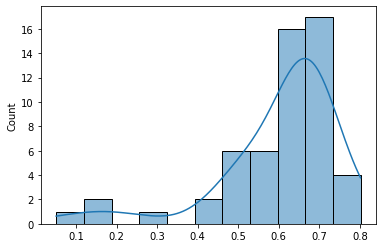

In [3]:
import seaborn as sns

sns.histplot(probabilities["70"], kde=True)

(0.5191188425526247, 0.6650171638131459, 0.019101066937599248)


<AxesSubplot:ylabel='Density'>

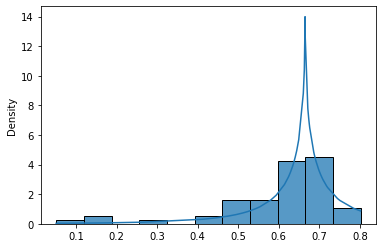

In [6]:
from scipy.stats import gennorm

params = gennorm.fit(probabilities["70"])
print(params)
sns.histplot(probabilities["70"], kde=False, stat="density")
sns.lineplot(x=probabilities["70"], y=gennorm.pdf(probabilities["70"], *params))



(0.6003917209857567, 0.14950893165607562)


<AxesSubplot:ylabel='Density'>

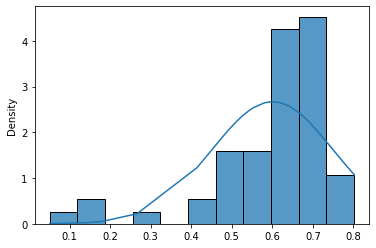

In [10]:
from scipy.stats import norm 

nparams = norm.fit(probabilities["70"])
print(nparams)
sns.histplot(probabilities["70"], kde=False, stat="density")
sns.lineplot(x=probabilities["70"], y=norm.pdf(probabilities["70"], *nparams))


In [16]:
from scipy.stats import shapiro

def remove_until_normality(data, alpha=0.05):
    """
    Remove the smallest values from the data until the remaining distribution satisfies the Shapiro-Wilk normality test.
    
    Parameters:
    - data (list): A list of numbers.
    - alpha (float): Significance level for the Shapiro-Wilk test (default is 0.05).
    
    Returns:
    - list: A list of outliers removed to achieve normality.
    """
    sorted_data = sorted(data)
    p_value = 0
    removed_values = []
    
    while len(sorted_data) > 2:  # at least 3 data points are required for the test
        _, p_value = shapiro(sorted_data)
        
        if p_value > alpha:  # if the data is normal
            break
        else:
            removed_value = sorted_data.pop(0)  # remove the smallest value
            removed_values.append(removed_value)
    
    return removed_values



In [19]:
threshold_for_70 = max(remove_until_normality(probabilities["70"]))
threshold_for_80 = max(remove_until_normality(probabilities["80"]))
threshold_for_90 = max(remove_until_normality(probabilities["90"]))
threshold_for_95 = max(remove_until_normality(probabilities["95"]))
threshold_for_99 = max(remove_until_normality(probabilities["99"]))

print(threshold_for_70, threshold_for_80, threshold_for_90, threshold_for_95, threshold_for_99)

0.4943907007279538 0.5987728273539696 0.7286221588826429 0.8136399794940692 0.9127438647113504


In [11]:
sum(probabilities["70"])/len(probabilities["70"])

0.6003917209857567